In [2]:
import pandas as pd

# Define the path to your dataset
file_path = r'C:/Users/COOL/sdn_ddos_backend/dataset/Syn-balanced-training-data.parquet'

# Load the dataset
df = pd.read_parquet(file_path)

# Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

# --- Initial Verification ---
print("--- Data Info ---")
df.info()

print("\n--- Label Distribution ---")
# Verify that the dataset is balanced between BENIGN and SYN labels
print(df['Label'].value_counts())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   600000 non-null  float64
 1   Source Port                  600000 non-null  float64
 2   Destination Port             600000 non-null  float64
 3   Protocol                     600000 non-null  float64
 4   Flow Duration                600000 non-null  float64
 5   Total Fwd Packets            600000 non-null  float64
 6   Total Backward Packets       600000 non-null  float64
 7   Total Length of Fwd Packets  600000 non-null  float64
 8   Total Length of Bwd Packets  600000 non-null  float64
 9   Fwd Packet Length Max        600000 non-null  float64
 10  Fwd Packet Length Min        600000 non-null  float64
 11  Fwd Packet Length Mean       600000 non-null  float64
 12  Fwd Packet Length Std        600000 non-

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Varianc

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Define your feature "contract"
contract_features = [
    'Protocol',
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Fwd IAT Total',
    'Packet Length Mean',
    'FIN Flag Count',
    'SYN Flag Count'
]

# 2. Select only the contract features and the label
df_model = df[contract_features + ['Label']].copy()

# 3. Clean the data by removing any infinite or missing values
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)
df_model.dropna(inplace=True)

# 4. Separate features (X) and the target label (y)
X = df_model.drop('Label', axis=1)
y = df_model['Label']

# 5. Encode the text labels ('BENIGN', 'Syn') into numbers (0, 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 6. Split the data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# --- Verification ---
print("\n--- Data Splitting Complete ---")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


--- Data Splitting Complete ---
Training features shape: (420000, 8)
Testing features shape: (180000, 8)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model with standard parameters
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("\n--- Model Training Complete ---")


--- Model Training Complete ---



--- Model Performance Metrics ---
Accuracy: 0.9879
Precision: 0.9764
Recall: 0.9999
F1-Score: 0.9880

--- Confusion Matrix ---


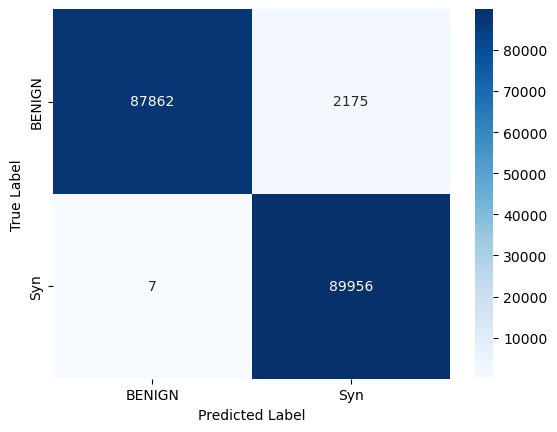

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print performance metrics
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
print(f"Precision: {precision_score(y_test, predictions):.4f}")
print(f"Recall: {recall_score(y_test, predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, predictions):.4f}")

# Display a confusion matrix to visualize performance
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [7]:
import joblib
import os

# Define the folder and file path
model_folder = r'C:/Users/COOL/sdn_ddos_backend/models'
file_path = os.path.join(model_folder, 'syn_flood_model.joblib')

# Create the directory if it doesn't exist
os.makedirs(model_folder, exist_ok=True)

# Save the trained model to the file
joblib.dump(model, file_path)

print(f"\n--- Model Saved ---")
print(f"Specialized SYN flood model saved to: {file_path}")


--- Model Saved ---
Specialized SYN flood model saved to: C:/Users/COOL/sdn_ddos_backend/models\syn_flood_model.joblib
